<a href="https://colab.research.google.com/github/arpithagurumurthy/CMPE260_Reinforcement_Learning/blob/main/ColabNotebooks_StableBaselines/A2C_StableBaselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installations required
!pip install tensorflow-gpu==1.15.0
!pip install tensorflow==1.15.0
!pip install stable-baselines
!pip install gym-anytrading gym

     |████████████████████████████████| 411.5 MB 7.8 kB/s 
     |████████████████████████████████| 503 kB 57.2 MB/s 
     |████████████████████████████████| 3.8 MB 25.8 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5b24035805690565ecdb09be58635d71056235f324c4852054f79a31fd48a648
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succe

## **Experimenting with Stable baselines A2C**

Trying out A2C algorithm from stable baselines library on our datasets to check for performance

The envirnment used is gym-anytrading: https://github.com/AminHP/gym-anytrading 

In [4]:
##For algorithms
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
##Data preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
##Environments
import gym
import gym_anytrading
##Neural net
from stable_baselines.common.policies import MlpPolicy
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Apple Dataset for training the A2C model imported from Baselines

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/CMPE260-RL-Project/Data/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-30,27.900000,28.049999,27.567499,27.629999,26.007618,144649200
1,2016-12-01,27.592501,27.735001,27.257500,27.372499,25.765238,148347600
2,2016-12-02,27.292500,27.522499,27.212500,27.475000,25.861715,106112000
3,2016-12-05,27.500000,27.507500,27.062500,27.277500,25.675810,137298000
4,2016-12-06,27.375000,27.590000,27.297501,27.487499,25.873486,104782000


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-30,27.900000,28.049999,27.567499,27.629999,26.007618,144649200
1,2016-12-01,27.592501,27.735001,27.257500,27.372499,25.765238,148347600
2,2016-12-02,27.292500,27.522499,27.212500,27.475000,25.861715,106112000
3,2016-12-05,27.500000,27.507500,27.062500,27.277500,25.675810,137298000
4,2016-12-06,27.375000,27.590000,27.297501,27.487499,25.873486,104782000


In [7]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [8]:
env.signal_features

array([[ 2.7629999e+01,  0.0000000e+00],
       [ 2.7372499e+01, -2.5750000e-01],
       [ 2.7475000e+01,  1.0250100e-01],
       [ 2.7277500e+01, -1.9750000e-01],
       [ 2.7487499e+01,  2.0999900e-01],
       [ 2.7757500e+01,  2.7000100e-01],
       [ 2.8030001e+01,  2.7250100e-01],
       [ 2.8487499e+01,  4.5749800e-01],
       [ 2.8325001e+01, -1.6249800e-01],
       [ 2.8797501e+01,  4.7250000e-01],
       [ 2.8797501e+01,  0.0000000e+00],
       [ 2.8955000e+01,  1.5749900e-01],
       [ 2.8992500e+01,  3.7500000e-02],
       [ 2.9160000e+01,  1.6750000e-01],
       [ 2.9237499e+01,  7.7499000e-02],
       [ 2.9264999e+01,  2.7500000e-02],
       [ 2.9072500e+01, -1.9249900e-01],
       [ 2.9129999e+01,  5.7499000e-02],
       [ 2.9315001e+01,  1.8500200e-01],
       [ 2.9190001e+01, -1.2500000e-01],
       [ 2.9182501e+01, -7.5000000e-03],
       [ 2.8955000e+01, -2.2750100e-01],
       [ 2.9037500e+01,  8.2500000e-02],
       [ 2.9004999e+01, -3.2501000e-02],
       [ 2.91525

In [9]:
env.action_space

Discrete(2)

info {'total_reward': 5.175011000000023, 'total_profit': 0.8427385013698312, 'position': 0}


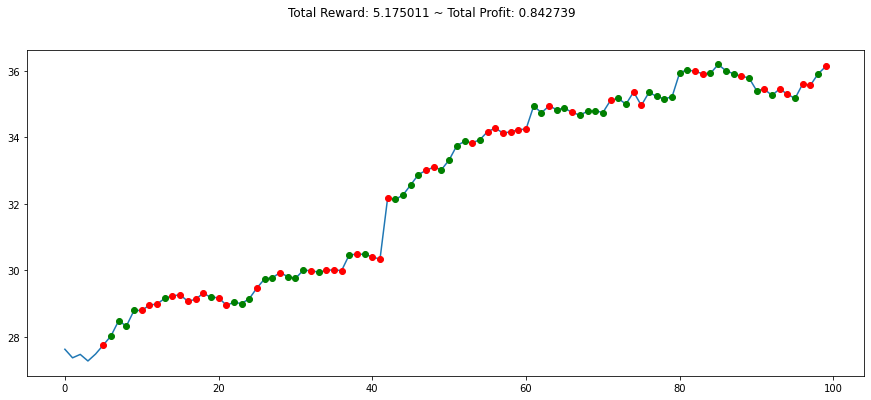

In [10]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [13]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=25000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.368   |
| fps                | 25       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.091    |
---------------------------------
---------------------------------
| explained_variance | -68.2    |
| fps                | 656      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.00699  |
---------------------------------
---------------------------------
| explained_variance | -0.0825  |
| fps                | 737     

# Evaluating against FB Dataset

In [14]:
fb_df = pd.read_csv('/content/drive/Shareddrives/CMPE260-RL-Project/Data/FB.csv')

In [16]:
env = gym.make('stocks-v0', df=fb_df, frame_bound=(10,30), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 5.470001999999994, 'total_profit': 0.9891387050945785, 'position': 1}


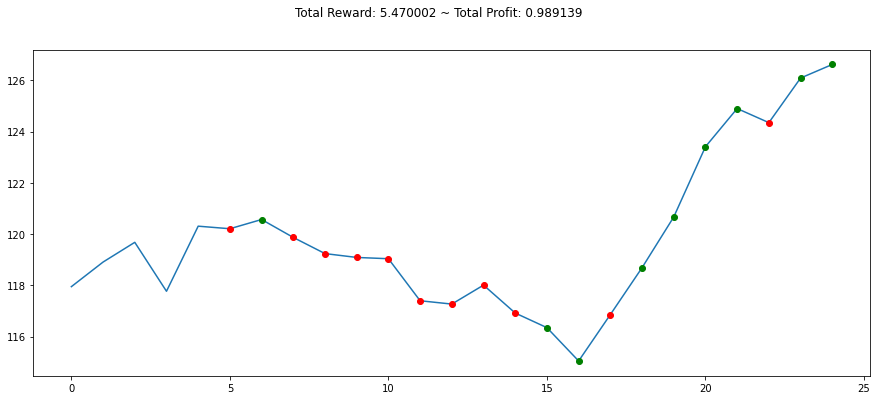

In [17]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

##References

1.   https://github.com/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/
2. https://github.com/DeepNeuralAI/RL-DeepQLearning-Trading